In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
from platform import python_version
print(python_version())

3.7.3


In [4]:
import torch
from src.conv_cnp import ConvCNP
from src.datagen.sinecurve import *
from src.datagen.gpcurve import *

## GP tester

- RBF
- Matern
- Additive
- Product

In [5]:
gpgen = RBFGPCurvesReader(16, 100)

In [6]:
a = gpgen.generate_curves()

In [7]:
import matplotlib.pyplot as plt

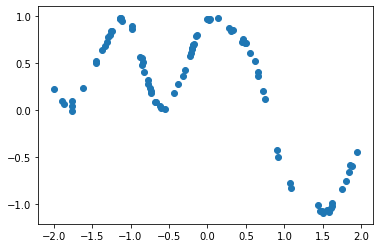

In [8]:
plt.scatter(a[0][0][0][0], a[0][0][1][0])

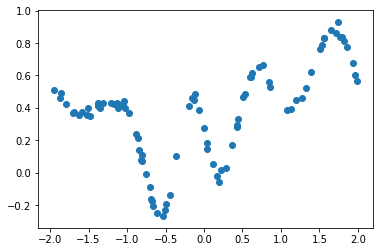

In [9]:
plt.scatter(a[0][0][0][1], a[0][0][1][1])

In [10]:
materngp = MaternGPCurvesReader(16,100)

In [11]:
a = gpgen.generate_curves()

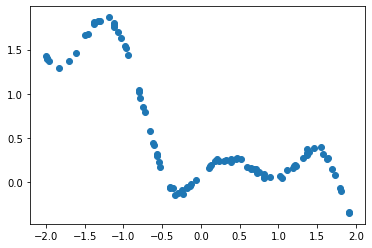

In [12]:
plt.scatter(a[0][0][0][0], a[0][0][1][0])

## Sine curve tester


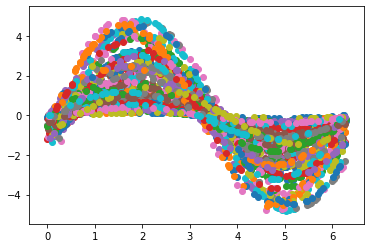

In [13]:
this = SineCurvesReader().generate_curves()
context_data_x, context_data_y = this.query[0]
context_data_x = context_data_x.squeeze()
context_data_y = context_data_y.squeeze()

context_data_x.shape
context_data_y.shape

for curve_id in range(context_data_x.shape[0]):
    plt.scatter(context_data_x[curve_id, :].tolist(), context_data_y[curve_id, :].tolist())

## Training

In [14]:
MAX_CONTEXT_POINTS = 50 
random_kernel_parameters=True

# Train dataset
dataset_train = RBFGPCurvesReader(
    batch_size=16, max_num_context=MAX_CONTEXT_POINTS, random_kernel_parameters=random_kernel_parameters)
data_train = dataset_train.generate_curves()

# Test dataset
dataset_test = RBFGPCurvesReader(
    batch_size=1, max_num_context=MAX_CONTEXT_POINTS, testing=True, random_kernel_parameters=random_kernel_parameters)
data_test = dataset_test.generate_curves()


In [15]:
data_train.query[0][0].shape

torch.Size([16, 20, 1])

In [16]:
data_train.query[0][1].shape

torch.Size([16, 20, 1])

In [17]:
data_train.query[1][0].shape

torch.Size([44, 1])

In [18]:
data_train.target_y.shape

torch.Size([16, 44, 1])

In [19]:
conv_cnp = ConvCNP()

In [20]:
conv_cnp

ConvCNP(
  (kernal_x): EQKernel()
  (kernal_rho): EQKernel()
  (rho_cnn): SimpleCNN(
    (model): Sequential(
      (0): Conv1d(3, 16, kernel_size=(5,), stride=(1,), padding=(2,))
      (1): ReLU()
      (2): Conv1d(16, 32, kernel_size=(5,), stride=(1,), padding=(2,))
      (3): ReLU()
      (4): Conv1d(32, 16, kernel_size=(5,), stride=(1,), padding=(2,))
      (5): ReLU()
      (6): Conv1d(16, 2, kernel_size=(5,), stride=(1,), padding=(2,))
    )
  )
)

In [21]:
# list(conv_cnp.parameters())

In [22]:
import torch.optim as optim
optimizer = optim.Adam(conv_cnp.parameters(), lr=0.001)

In [23]:
EPOCHS = 50000

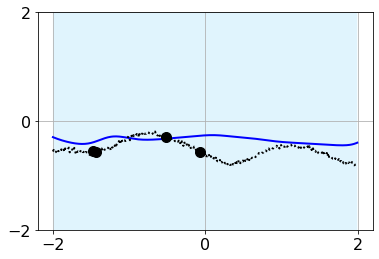

epoch: 0, loss: 43.361328125, x_kernal_length: 0.1490, rho_kernal_length: 0.1490


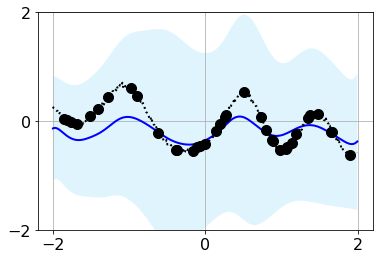

epoch: 100, loss: 20.82929229736328, x_kernal_length: 0.1459, rho_kernal_length: 0.0893


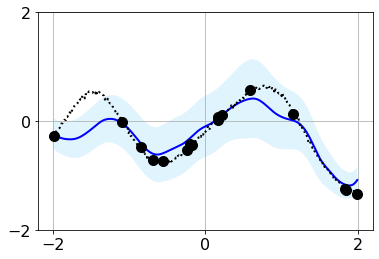

epoch: 200, loss: -0.7049095034599304, x_kernal_length: 0.1398, rho_kernal_length: 0.0411


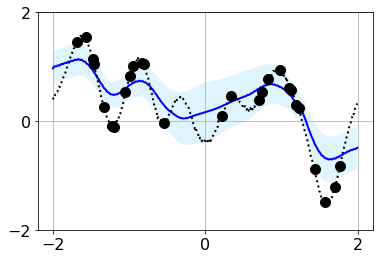

epoch: 300, loss: 14.649850845336914, x_kernal_length: 0.1218, rho_kernal_length: 0.0235


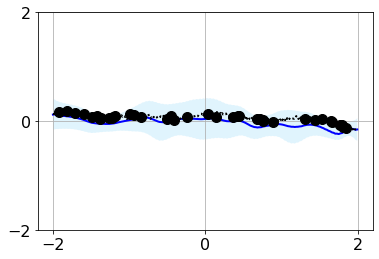

epoch: 400, loss: 10.856401443481445, x_kernal_length: 0.1012, rho_kernal_length: 0.0224


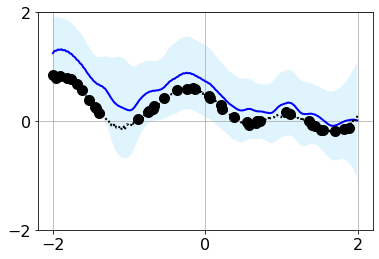

epoch: 500, loss: 8.781742095947266, x_kernal_length: 0.0659, rho_kernal_length: 0.0244


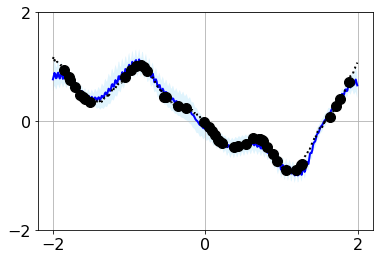

epoch: 600, loss: -10.70363712310791, x_kernal_length: 0.0615, rho_kernal_length: 0.0183


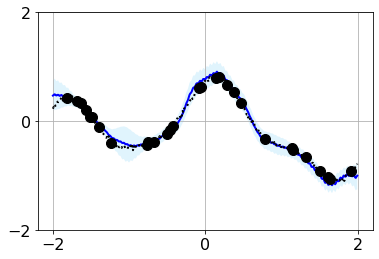

epoch: 700, loss: -13.57889461517334, x_kernal_length: 0.0558, rho_kernal_length: 0.0214


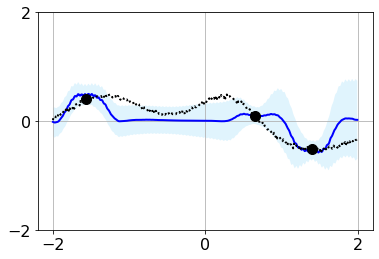

epoch: 800, loss: -8.433090209960938, x_kernal_length: 0.0441, rho_kernal_length: 0.0204


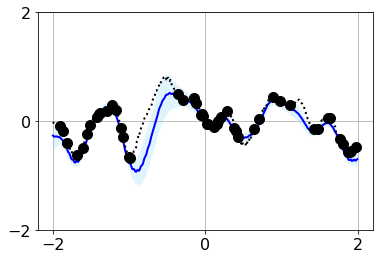

epoch: 900, loss: 5.992476463317871, x_kernal_length: 0.0386, rho_kernal_length: 0.0217


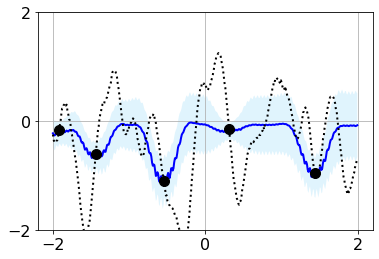

epoch: 1000, loss: 1.9063594341278076, x_kernal_length: 0.0303, rho_kernal_length: 0.0184


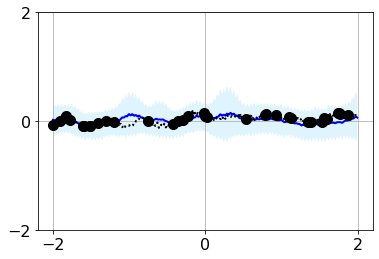

epoch: 1100, loss: 2.7012767791748047, x_kernal_length: 0.0222, rho_kernal_length: 0.0171


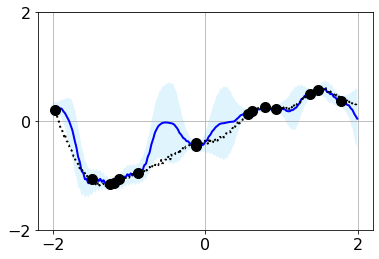

epoch: 1200, loss: -13.375406265258789, x_kernal_length: 0.0298, rho_kernal_length: 0.0212


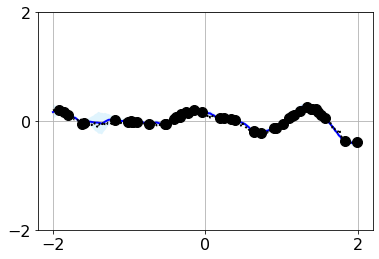

epoch: 1300, loss: -24.066194534301758, x_kernal_length: 0.0328, rho_kernal_length: 0.0210


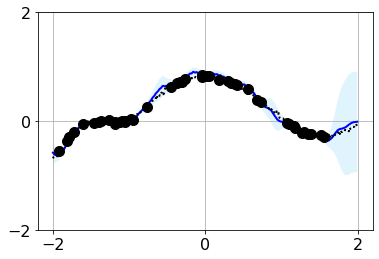

epoch: 1400, loss: -26.49802589416504, x_kernal_length: 0.0292, rho_kernal_length: 0.0232


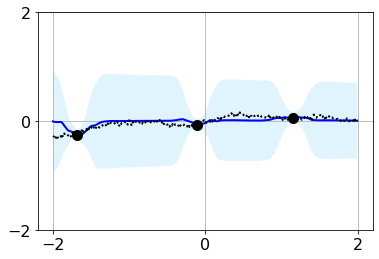

epoch: 1500, loss: -12.554404258728027, x_kernal_length: 0.0294, rho_kernal_length: 0.0226


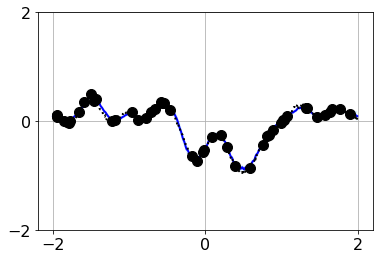

epoch: 1600, loss: -28.54490089416504, x_kernal_length: 0.0305, rho_kernal_length: 0.0211


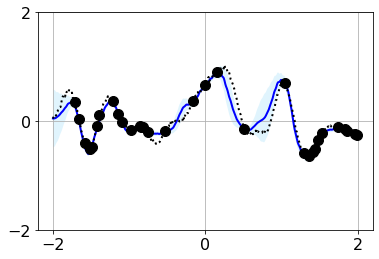

epoch: 1700, loss: -20.617345809936523, x_kernal_length: 0.0298, rho_kernal_length: 0.0222


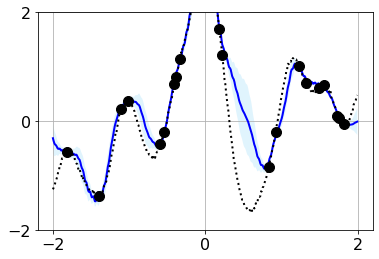

epoch: 1800, loss: -31.05203628540039, x_kernal_length: 0.0318, rho_kernal_length: 0.0213


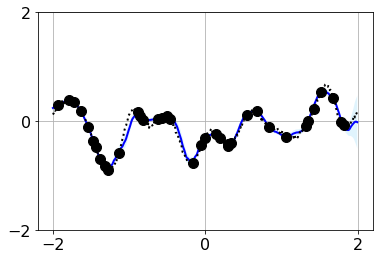

epoch: 1900, loss: 25.66573715209961, x_kernal_length: 0.0301, rho_kernal_length: 0.0225


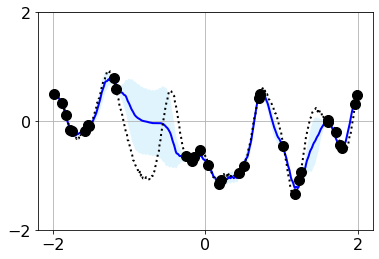

epoch: 2000, loss: -28.59530258178711, x_kernal_length: 0.0307, rho_kernal_length: 0.0221


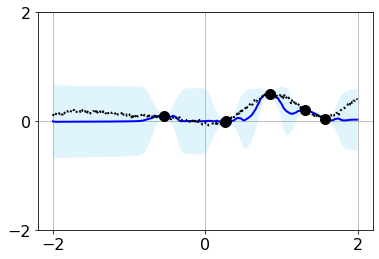

epoch: 2100, loss: -29.126859664916992, x_kernal_length: 0.0288, rho_kernal_length: 0.0223


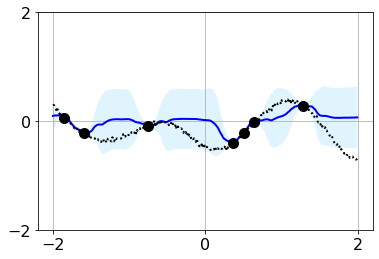

epoch: 2200, loss: -30.539518356323242, x_kernal_length: 0.0292, rho_kernal_length: 0.0226


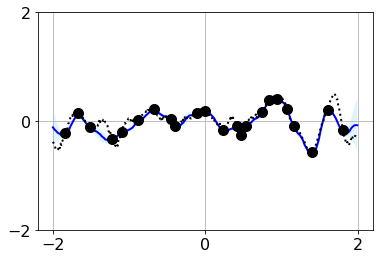

epoch: 2300, loss: -25.447778701782227, x_kernal_length: 0.0282, rho_kernal_length: 0.0224


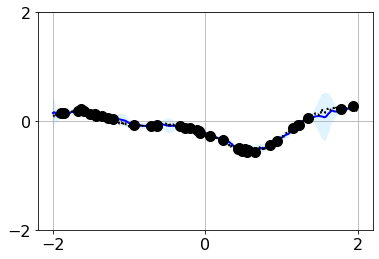

epoch: 2400, loss: -19.655458450317383, x_kernal_length: 0.0285, rho_kernal_length: 0.0229


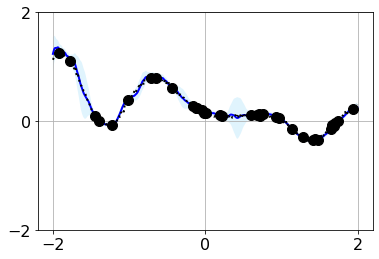

epoch: 2500, loss: -29.5960636138916, x_kernal_length: 0.0279, rho_kernal_length: 0.0237


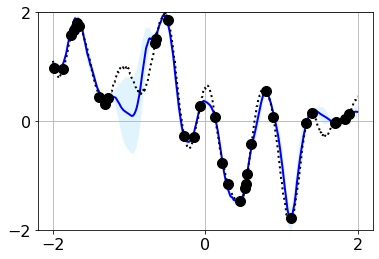

epoch: 2600, loss: -7.301454544067383, x_kernal_length: 0.0306, rho_kernal_length: 0.0236


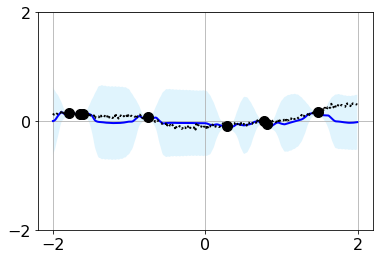

epoch: 2700, loss: -28.05001449584961, x_kernal_length: 0.0296, rho_kernal_length: 0.0234


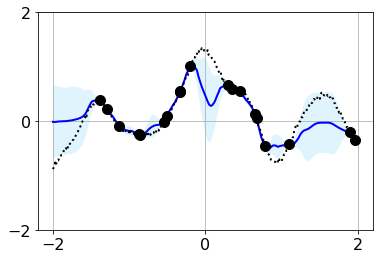

epoch: 2800, loss: -27.717424392700195, x_kernal_length: 0.0292, rho_kernal_length: 0.0236


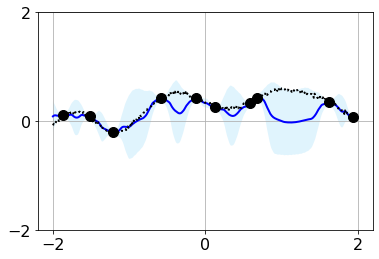

epoch: 2900, loss: -27.339284896850586, x_kernal_length: 0.0264, rho_kernal_length: 0.0244


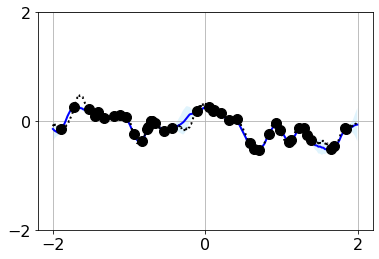

epoch: 3000, loss: -30.477657318115234, x_kernal_length: 0.0282, rho_kernal_length: 0.0227


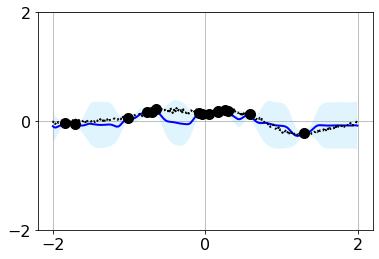

epoch: 3100, loss: -14.880779266357422, x_kernal_length: 0.0198, rho_kernal_length: 0.0344


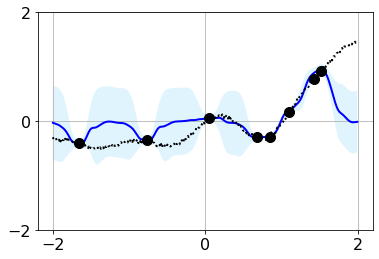

epoch: 3200, loss: -0.5385184288024902, x_kernal_length: 0.0261, rho_kernal_length: 0.0307


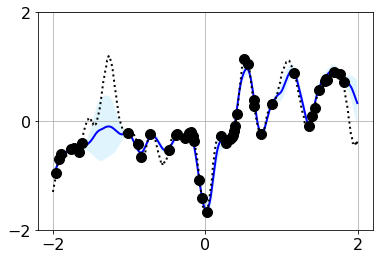

epoch: 3300, loss: 0.6395148038864136, x_kernal_length: 0.0303, rho_kernal_length: 0.0272


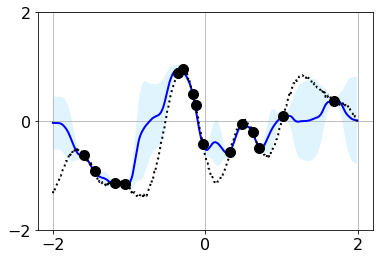

epoch: 3400, loss: -32.9500846862793, x_kernal_length: 0.0276, rho_kernal_length: 0.0259


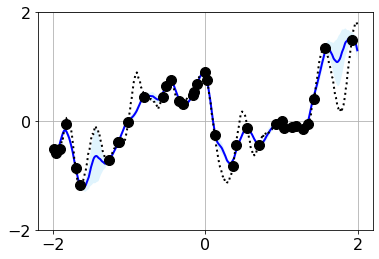

epoch: 3500, loss: -29.985307693481445, x_kernal_length: 0.0278, rho_kernal_length: 0.0244


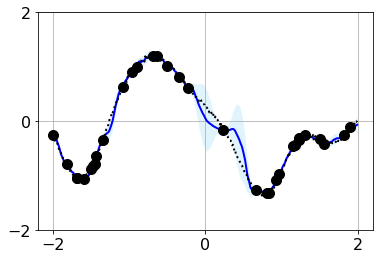

epoch: 3600, loss: -34.06954574584961, x_kernal_length: 0.0261, rho_kernal_length: 0.0226


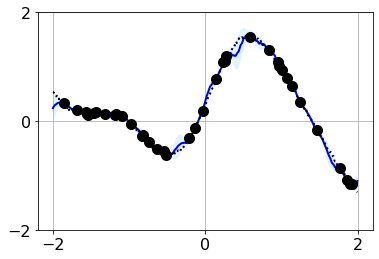

epoch: 3700, loss: -37.4547119140625, x_kernal_length: 0.0278, rho_kernal_length: 0.0231


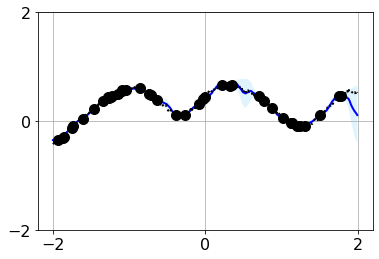

epoch: 3800, loss: -34.83988571166992, x_kernal_length: 0.0283, rho_kernal_length: 0.0230


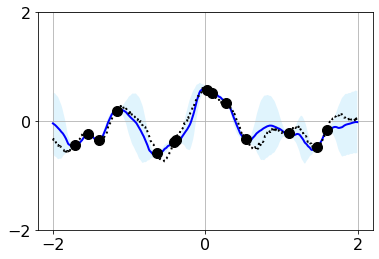

epoch: 3900, loss: -24.788986206054688, x_kernal_length: 0.0279, rho_kernal_length: 0.0232


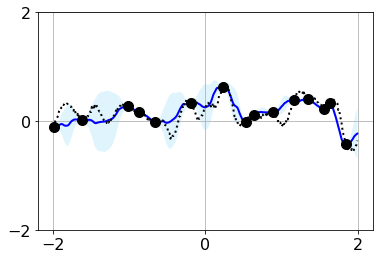

epoch: 4000, loss: -32.972145080566406, x_kernal_length: 0.0277, rho_kernal_length: 0.0235


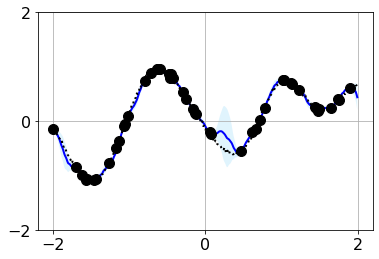

epoch: 4100, loss: -13.977496147155762, x_kernal_length: 0.0270, rho_kernal_length: 0.0229


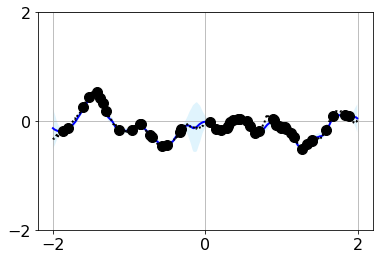

epoch: 4200, loss: -17.02861213684082, x_kernal_length: 0.0274, rho_kernal_length: 0.0229


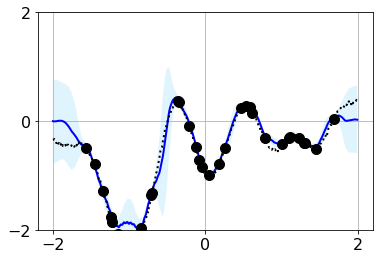

epoch: 4300, loss: -21.113983154296875, x_kernal_length: 0.0268, rho_kernal_length: 0.0235


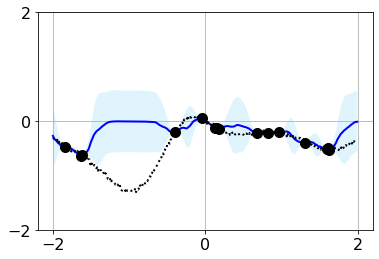

epoch: 4400, loss: -37.383216857910156, x_kernal_length: 0.0264, rho_kernal_length: 0.0229


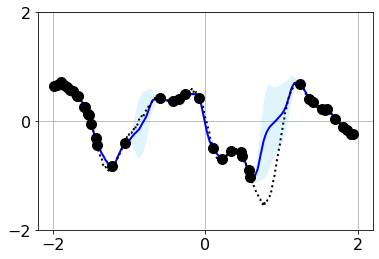

epoch: 4500, loss: -36.57115936279297, x_kernal_length: 0.0276, rho_kernal_length: 0.0237


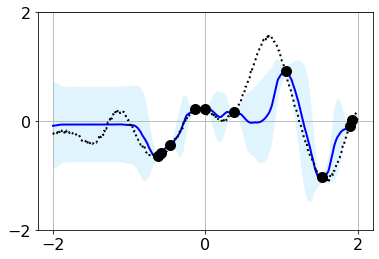

epoch: 4600, loss: -25.89987564086914, x_kernal_length: 0.0272, rho_kernal_length: 0.0236


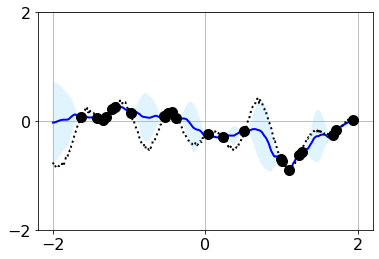

epoch: 4700, loss: -33.69486618041992, x_kernal_length: 0.0289, rho_kernal_length: 0.0233


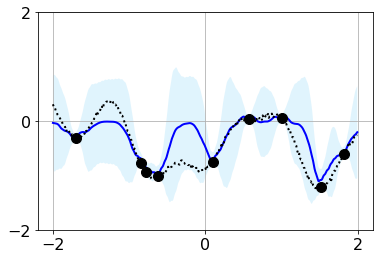

epoch: 4800, loss: -22.72928810119629, x_kernal_length: 0.0252, rho_kernal_length: 0.0231


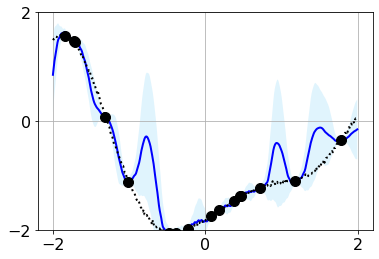

epoch: 4900, loss: -35.24127197265625, x_kernal_length: 0.0296, rho_kernal_length: 0.0236


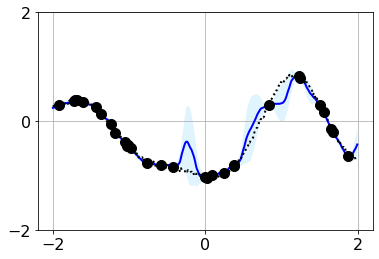

epoch: 5000, loss: -22.408145904541016, x_kernal_length: 0.0270, rho_kernal_length: 0.0234


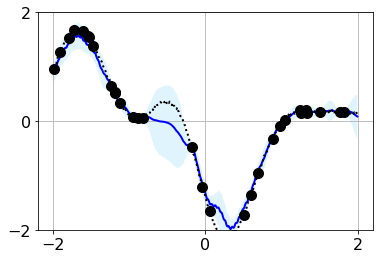

epoch: 5100, loss: -19.46485137939453, x_kernal_length: 0.0294, rho_kernal_length: 0.0229


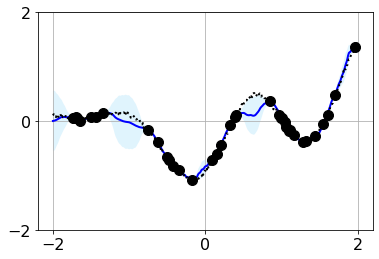

epoch: 5200, loss: -35.35809326171875, x_kernal_length: 0.0268, rho_kernal_length: 0.0231


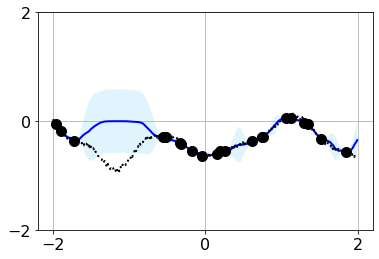

epoch: 5300, loss: -26.981752395629883, x_kernal_length: 0.0301, rho_kernal_length: 0.0235


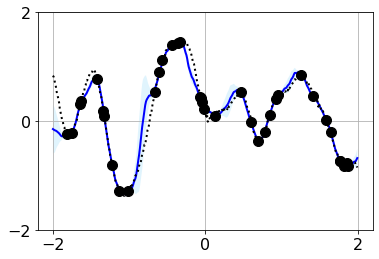

epoch: 5400, loss: -26.678112030029297, x_kernal_length: 0.0317, rho_kernal_length: 0.0228


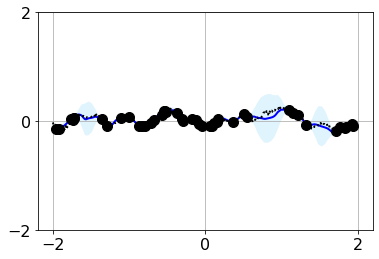

epoch: 5500, loss: -38.5009765625, x_kernal_length: 0.0279, rho_kernal_length: 0.0234


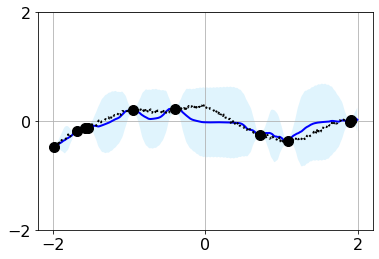

epoch: 5600, loss: -22.44709014892578, x_kernal_length: 0.0270, rho_kernal_length: 0.0233


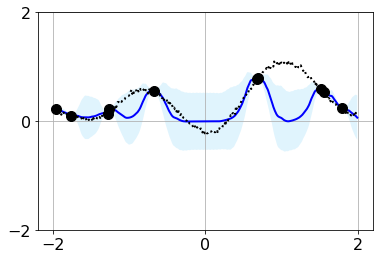

epoch: 5700, loss: -41.311126708984375, x_kernal_length: 0.0280, rho_kernal_length: 0.0238


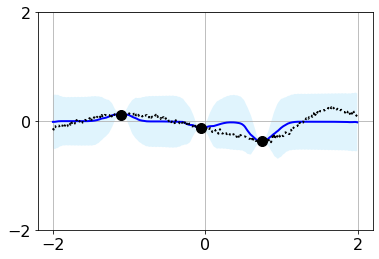

epoch: 5800, loss: -16.05381965637207, x_kernal_length: 0.0296, rho_kernal_length: 0.0238


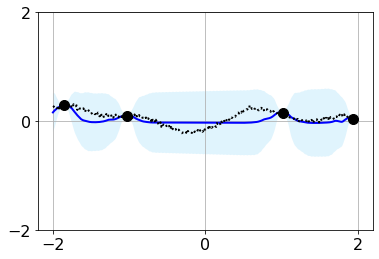

epoch: 5900, loss: -16.415897369384766, x_kernal_length: 0.0263, rho_kernal_length: 0.0240


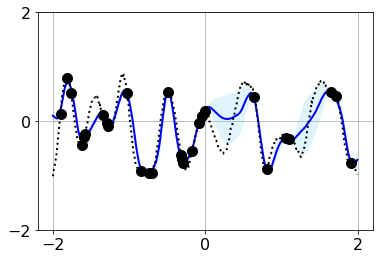

epoch: 6000, loss: -42.40839767456055, x_kernal_length: 0.0282, rho_kernal_length: 0.0242


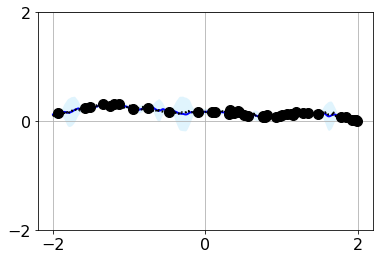

epoch: 6100, loss: -29.00983428955078, x_kernal_length: 0.0275, rho_kernal_length: 0.0241


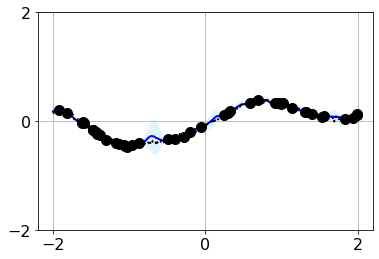

epoch: 6200, loss: -36.524696350097656, x_kernal_length: 0.0282, rho_kernal_length: 0.0237


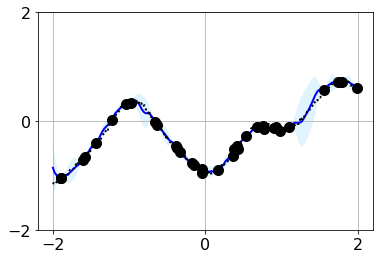

epoch: 6300, loss: -35.740848541259766, x_kernal_length: 0.0271, rho_kernal_length: 0.0244


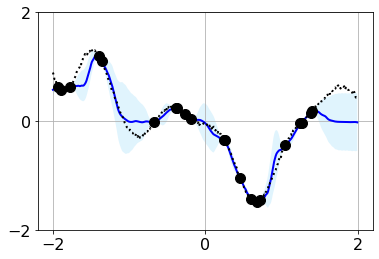

epoch: 6400, loss: -22.616941452026367, x_kernal_length: 0.0279, rho_kernal_length: 0.0241


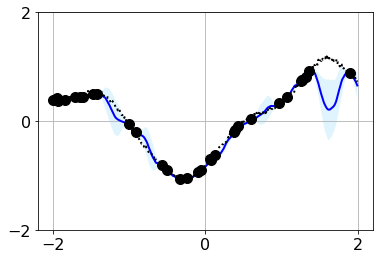

epoch: 6500, loss: 0.19509108364582062, x_kernal_length: 0.0271, rho_kernal_length: 0.0240


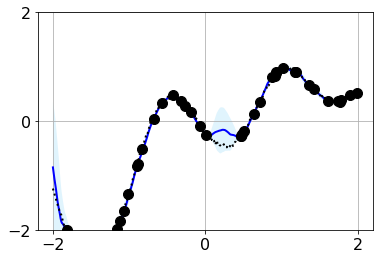

epoch: 6600, loss: -36.17898178100586, x_kernal_length: 0.0295, rho_kernal_length: 0.0241


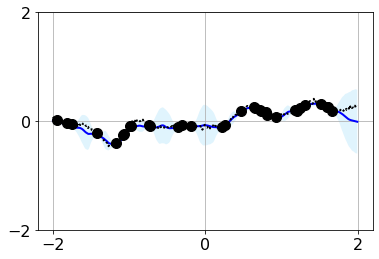

epoch: 6700, loss: -21.82513427734375, x_kernal_length: 0.0269, rho_kernal_length: 0.0241


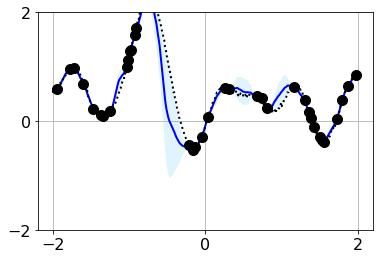

epoch: 6800, loss: -37.98401641845703, x_kernal_length: 0.0300, rho_kernal_length: 0.0240


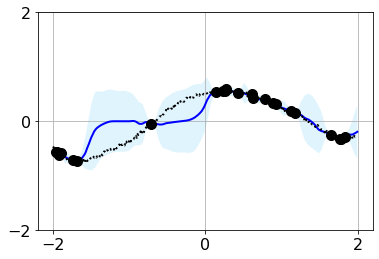

epoch: 6900, loss: -33.95817184448242, x_kernal_length: 0.0269, rho_kernal_length: 0.0241


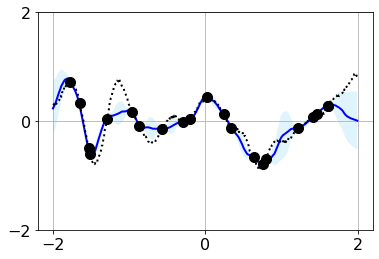

epoch: 7000, loss: -25.543426513671875, x_kernal_length: 0.0304, rho_kernal_length: 0.0242


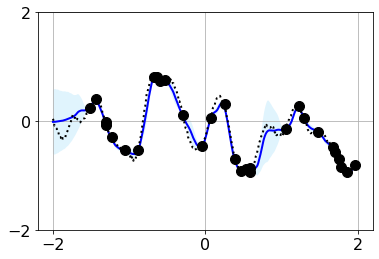

epoch: 7100, loss: -27.70327377319336, x_kernal_length: 0.0275, rho_kernal_length: 0.0245


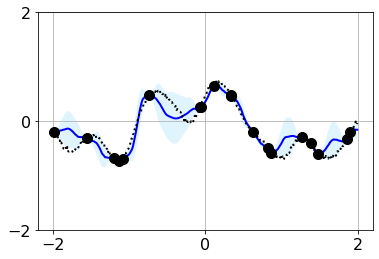

epoch: 7200, loss: -38.06022262573242, x_kernal_length: 0.0285, rho_kernal_length: 0.0240


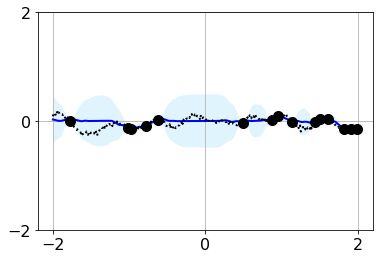

epoch: 7300, loss: -41.42003631591797, x_kernal_length: 0.0244, rho_kernal_length: 0.0237


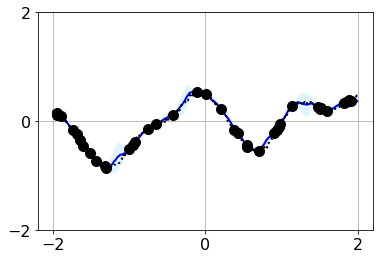

epoch: 7400, loss: -39.67380142211914, x_kernal_length: 0.0275, rho_kernal_length: 0.0235


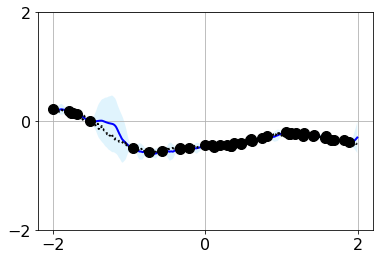

epoch: 7500, loss: -37.08045959472656, x_kernal_length: 0.0265, rho_kernal_length: 0.0239


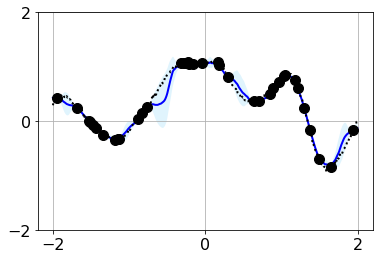

epoch: 7600, loss: -34.79802703857422, x_kernal_length: 0.0288, rho_kernal_length: 0.0242


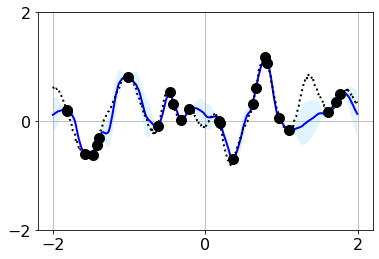

epoch: 7700, loss: -2.912356376647949, x_kernal_length: 0.0300, rho_kernal_length: 0.0240


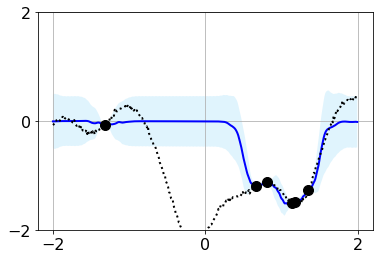

epoch: 7800, loss: -41.8537483215332, x_kernal_length: 0.0269, rho_kernal_length: 0.0241


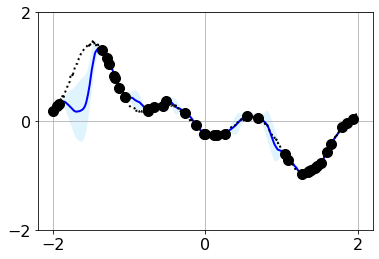

epoch: 7900, loss: -38.17657470703125, x_kernal_length: 0.0279, rho_kernal_length: 0.0243


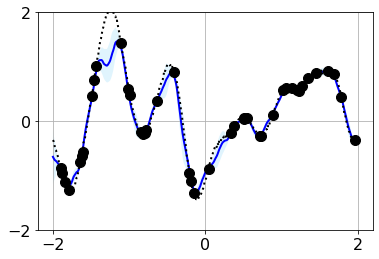

epoch: 8000, loss: -38.31288528442383, x_kernal_length: 0.0265, rho_kernal_length: 0.0241


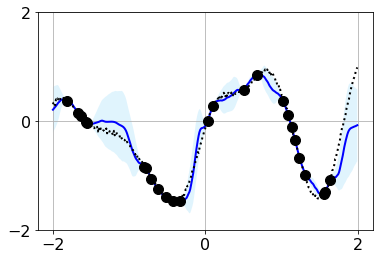

epoch: 8100, loss: -33.9862174987793, x_kernal_length: 0.0305, rho_kernal_length: 0.0246


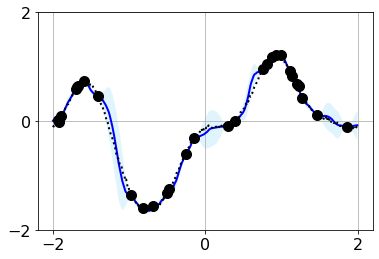

epoch: 8200, loss: -34.90937805175781, x_kernal_length: 0.0287, rho_kernal_length: 0.0244


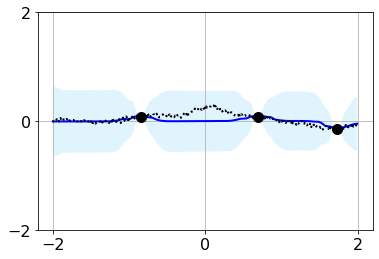

epoch: 8300, loss: -35.66669845581055, x_kernal_length: 0.0279, rho_kernal_length: 0.0233


KeyboardInterrupt: 

In [24]:
from src.utils import plot_functions
# torch.autograd.set_detect_anomaly(True)
for epoch in range(EPOCHS):
    epoch_loss = 0
    # Train dataset
    dataset_train = RBFGPCurvesReader(
    batch_size=16, max_num_context=MAX_CONTEXT_POINTS, random_kernel_parameters=random_kernel_parameters)
    data_train = dataset_train.generate_curves()
    x_context = data_train.query[0][0].contiguous().transpose(1,2)
    y_context = data_train.query[0][1].contiguous().transpose(1,2)
    x_target = data_train.query[1].contiguous().transpose(1,2)
    y_target = data_train.target_y.contiguous().transpose(1,2)
    optimizer.zero_grad()
    
    y_target_mu, y_target_sigma, loss = conv_cnp.forward(x_context, y_context, x_target, y_target)
    loss.sum().backward()
    optimizer.step()
    
    if (epoch % 100) == 0:
        data_test = dataset_test.generate_curves()
        x_context = data_test.query[0][0].contiguous().transpose(1,2)
        y_context = data_test.query[0][1].contiguous().transpose(1,2)
        x_target = data_test.query[1].contiguous().transpose(1,2)
        y_target = data_test.target_y.contiguous().transpose(1,2)
        y_target_mu, y_target_sigma, _ = conv_cnp.forward(x_context, y_context, x_target, y_target)
#         plt.scatter(x_target[0].cpu(), y_target_mu[0].cpu().data)
#         plt.show()
#         plt.close()
#         plt.figure()
#         plt.scatter(x_context[0].cpu(), y_context[0].cpu())
#         plt.show()
#         plt.close()
        plot_functions(
            x_target.transpose(1,2),
            y_target.transpose(1,2),
            x_context.transpose(1,2),
            y_context.transpose(1,2), 
            y_target_mu.transpose(1,2), 
            y_target_sigma.transpose(1,2)
        )
        print(f'epoch: {epoch}, loss: {loss.sum()}, x_kernal_length: {conv_cnp.kernal_x.length_scale:0.4f}, rho_kernal_length: {conv_cnp.kernal_rho.length_scale:0.4f}')

In [ ]:
batch_size, num_context_points, y_size = y_context.size()
_, num_target_points, _ = x_target.size()

# map the context points to their deterministic represnetations.
# r_i : Shape (batch_size, num_context_points, r_dim)
r_i = anp.deterministic_encoder(x_context, y_context)

In [ ]:
r_i.shape

In [ ]:
r_j = anp.attention(x_target, x_context, r_i)

In [ ]:
log_pred.shape

In [ ]:
kl_target_context.shape

In [ ]:
data_train.num_context_points

In [ ]:
x_context.shape

In [ ]:
data_train.num_total_points

In [ ]:
y_context.shape

In [ ]:
loss

In [ ]:
x_context[0].data

In [ ]:
plt.scatter(x_target[0], y_target_mu[0].data)
plt.scatter(x_context[0], y_context[0])

In [ ]:
plt.scatter(x_context[0], y_context[0])

In [ ]:
 y_context[0]